In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from PIL import Image
from skimage import data, util, exposure, color
from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage import feature

# LABORATORIO 2

## Apartado 1

formato: TIFF
(ancho, alto) = (7200, 2400)
modo:  L


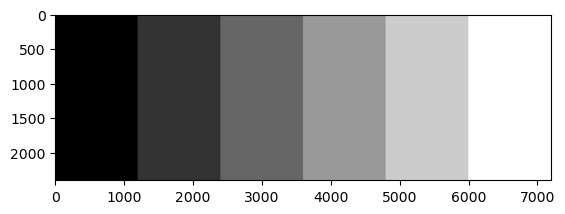

In [66]:
file = 'images/gray_bands.tif';
imagenBandas  = Image.open(file)
    
print('formato:', imagenBandas.format)
print('(ancho, alto) =', imagenBandas.size)
print('modo: ', imagenBandas.mode)

plt.imshow(imagenBandas, cmap='gray')

Vamos a reducir la imagen para poder trabajar mejor con ella

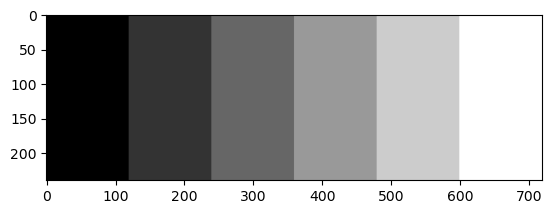

In [67]:
imagenBandasReducida = imagenBandas.reduce(10)
plt.imshow(imagenBandasReducida, cmap='gray')

## Apartado 2

En este apartado vamos a trabajar con operadores de gradientes, primero con filtro de prewitt, en ambos ejes separados y después en conjunto, comparándolo a su vez con filtro de sobel, para ver si observamos alguna diferencia.

Text(0.5, 1.0, 'Parcial en y')

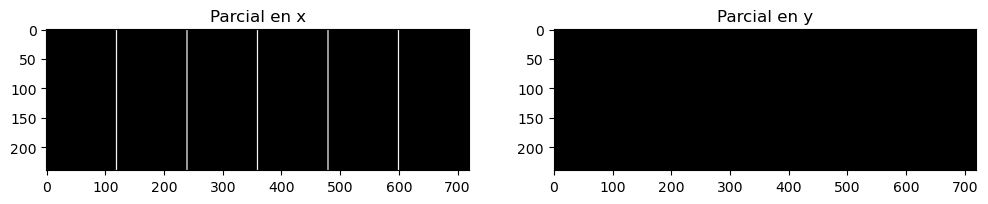

In [68]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(imagenBandasReducida,1), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(prewitt(imagenBandasReducida,0), cmap='gray')
plt.title('Parcial en y')

Text(0.5, 1.0, 'Filtro de prewitt')

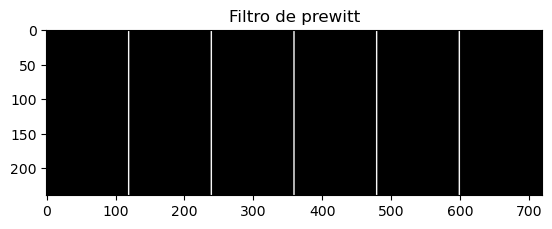

In [69]:
imagenBandasReducidaArray = np.array(imagenBandasReducida, dtype = 'uint8')
plt.imshow(filters.prewitt(imagenBandasReducidaArray), cmap='gray')
plt.title('Filtro de prewitt')

Text(0.5, 1.0, 'Sobel')

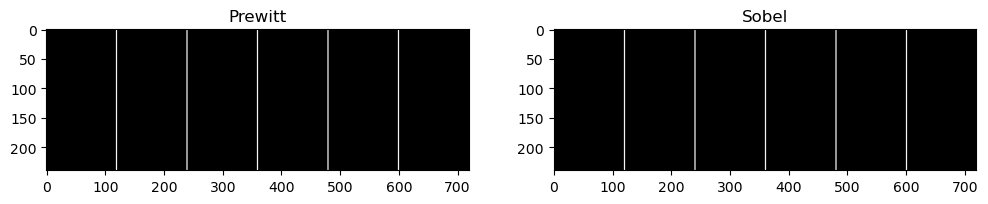

In [70]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(filters.prewitt(imagenBandasReducidaArray), cmap='gray')
plt.title('Prewitt')

plt.subplot(122)
plt.imshow(filters.sobel(imagenBandasReducidaArray), cmap='gray')
plt.title('Sobel')

Con ambos filtros obtenemos el mismo resultado.

## Apartado 3

Ahora vamos a aplicar el filtro de Laplaciana.

Text(0.5, 1.0, 'Detector de borde laplaciano')

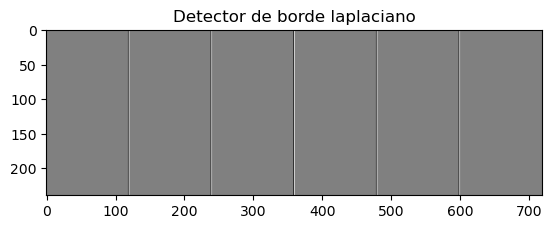

In [71]:
img_f = np.array(imagenBandasReducidaArray).astype('float')
img_lpl = filters.laplace(img_f)

plt.imshow(img_lpl, cmap='gray')
plt.title('Detector de borde laplaciano')

## Apartado 4

Vamos a añadir ruido a la imagen para ver si los filtros serían capaces de detectar los bordes en la imagen con ruido.

Text(0.5, 1.0, 'Imagen con ruido')

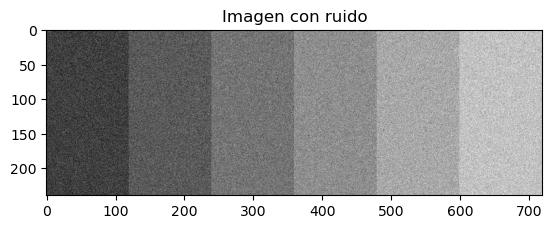

In [72]:
ruido = np.random.normal(0,20,imagenBandasReducidaArray.shape)
imagenRuido = imagenBandasReducidaArray + ruido
plt.imshow(imagenRuido, cmap = 'gray')
plt.title('Imagen con ruido')

## Apartado 5

Text(0.5, 1.0, 'Prewitt')

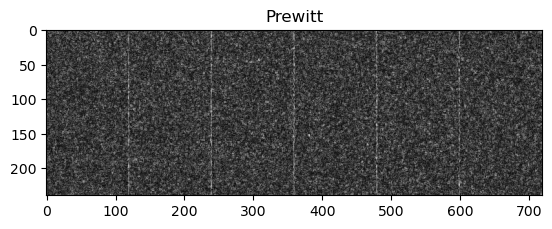

In [73]:
plt.imshow(filters.prewitt(imagenRuido), cmap='gray')
plt.title('Prewitt')

Text(0.5, 1.0, 'Sobel')

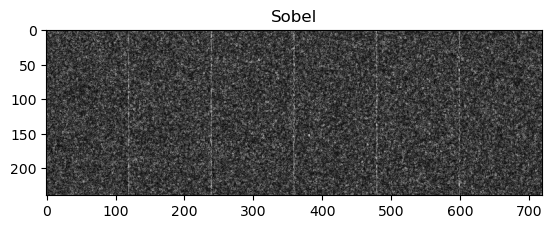

In [74]:
plt.imshow(filters.sobel(imagenRuido), cmap='gray')
plt.title('Sobel')

Text(0.5, 1.0, 'Filtro de Laplace')

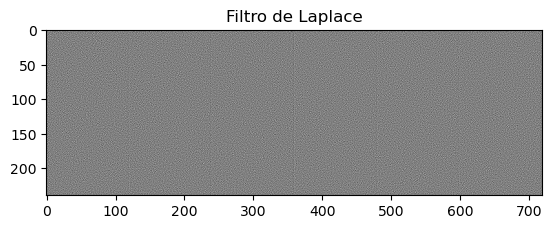

In [75]:
img_fR = np.array(imagenRuido).astype('float')
img_lplR = filters.laplace(img_fR)
plt.imshow(img_lplR, cmap='gray')
plt.title('Filtro de Laplace')

Como vemos, las detecciones de los cambios se hacen bastante mal, ya que los filtros se basan en el uso de derivadas. Al hacer las derivadas sobre una imagen con ruido, los puntitos que representan el ruido hacen que haya un cambio grande entre ese pixel y el contiguo, dejando de ser 0 la derivada y eso nos ocurre en toda la imagen. Además la laplaciana se ve aún peor ya que es la segunda deriva, es decir, la derivada sobre la derivada. En la imagen original, las zonas están bien diferenciadas una de otra aunque haya ruido, por eso detecta el cambio de banda pero si nos fijamos en el filtro de prewitt por ejemplo, ahi ya no se diferencia una de otra. Pues el filtro de laplaciana, vuelve a hacer la derivada sobre esa imagen, siendo incapaz de detectar la diferencia de bandas.

## Apartado 6

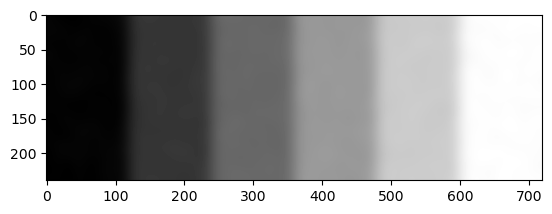

In [88]:
imgArreglada = gaussian_filter(imagenRuido, 10)
plt.imshow(imgArreglada, cmap='gray')

Text(0.5, 1.0, 'Prewitt')

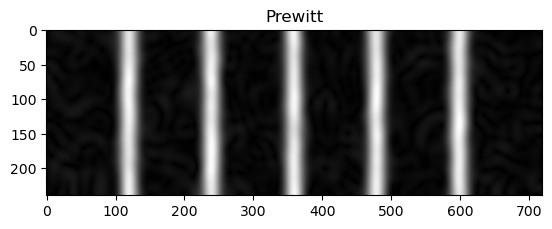

In [92]:
plt.imshow(filters.prewitt(imgArreglada), cmap='gray')
plt.title('Prewitt')

Text(0.5, 1.0, 'Sobel')

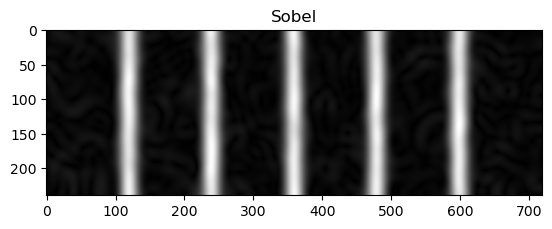

In [78]:
plt.imshow(filters.sobel(imgArreglada), cmap='gray')
plt.title('Sobel')

Text(0.5, 1.0, 'Filtro de Laplace')

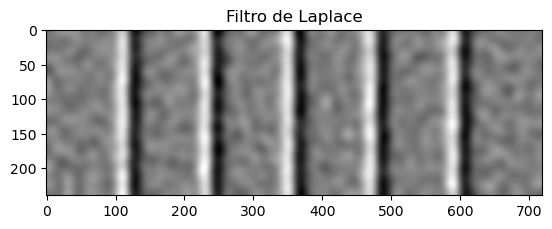

In [95]:
img_fA = np.array(imgArreglada).astype('float')
img_lplA = filters.laplace(img_fA)
plt.imshow(-img_lplA, cmap='gray')
plt.title('Filtro de Laplace')

Al hacer el filtrado gaussiano a la imagen, la división entre una banda y otra pasa a ser de un solo pixel a ser un difuminado de varios. Podríamos identificarlo como que en la imagen original es un escalón y en la filtrada, una rampa. Por ello mismo, el filtro de sobel y de prewitt detecta el borde más gordo. En el filtro de Laplace ocurre algo curioso. Una vez hecha la primera derivada de la imagen, obtenemos un nivel constante y varios escalones que suben cuando llegan a un cambio y bajan cuando salen de él. Pues al hacer la segunda derivada, el filtro de laplace nos detecta la subida como un nivel positivo y la bajada como un nivel negativo. El nivel positivo pasa a ser el máximo, el negativo 0 y los valores que antes eran 0 ahora se hacen niveles medios, transformándose a gris.

## Apartado 7

formato: TIFF
(ancho, alto) = (1114, 834)
modo:  L


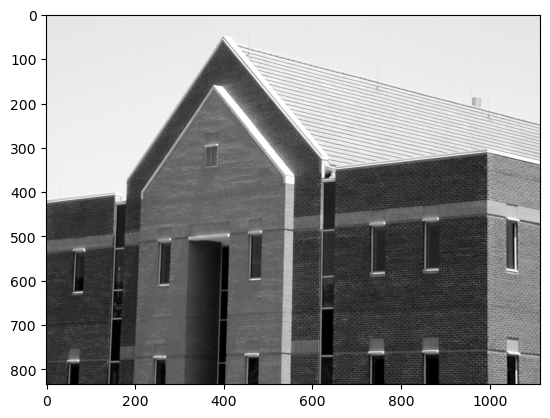

In [109]:
file = 'images/building.tif';
imagenEdificio  = Image.open(file)
    
print('formato:', imagenEdificio.format)
print('(ancho, alto) =', imagenEdificio.size)
print('modo: ', imagenEdificio.mode)

plt.imshow(imagenEdificio, cmap='gray')

Text(0.5, 1.0, 'Canny filter, $\\sigma=2$')

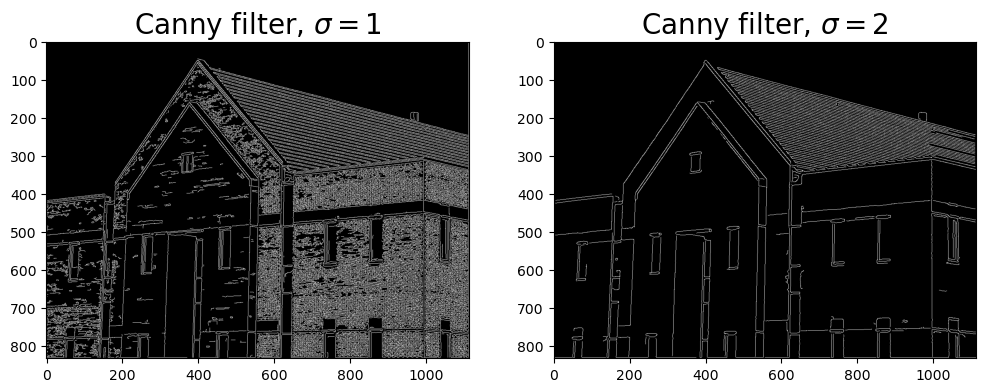

In [116]:
imgEdificioArray = np.array(imagenEdificio, dtype = 'uint8')
edges1 = feature.canny(imgEdificioArray)
edges2 = feature.canny(imgEdificioArray, sigma=2)

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.imshow(edges1, cmap='gray')
plt.title('Canny filter, $\sigma=1$', fontsize=20)

plt.subplot(122)
plt.imshow(edges2, cmap='gray')
plt.title('Canny filter, $\sigma=2$', fontsize=20)

Como vemos, con sigma = 1 nos detecta los pequeños cambios de las paredes, por lo que, como esto no me interesa, aumentamos el sigma y ya conseguimos quedarno con todo menos con esto mismo, ya que son los cambios menos significativos.

formato: TIFF
(ancho, alto) = (512, 512)
modo:  L


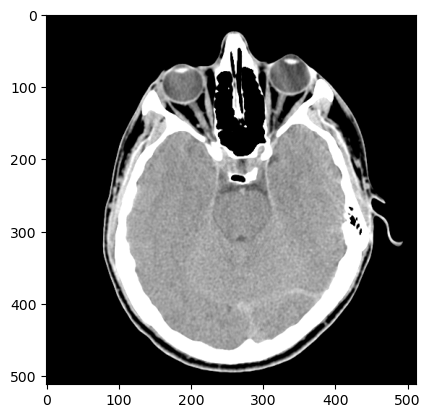

In [111]:
file = 'images/head_CT.tif';
imagenCerebro  = Image.open(file)
    
print('formato:', imagenCerebro.format)
print('(ancho, alto) =', imagenCerebro.size)
print('modo: ', imagenCerebro.mode)

plt.imshow(imagenCerebro, cmap='gray')

Text(0.5, 1.0, 'Canny filter, $\\sigma=3$')

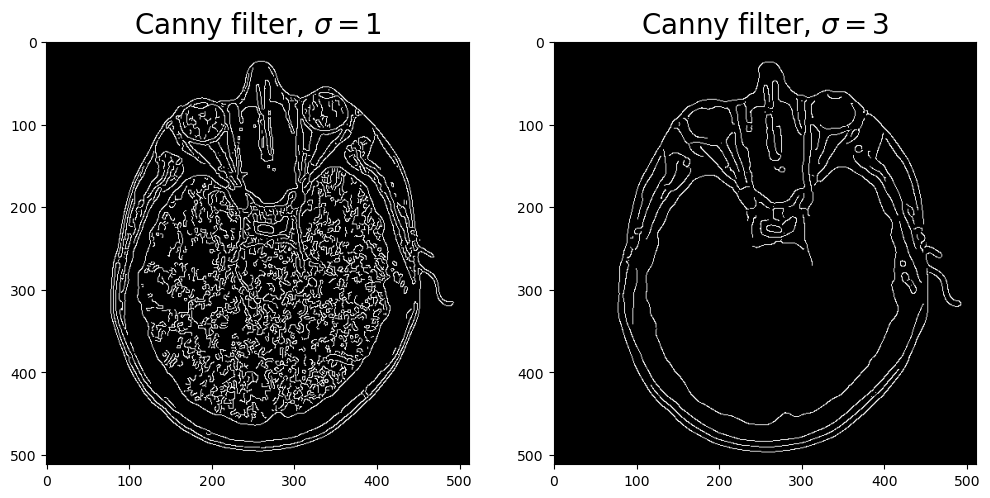

In [119]:
imagenCerebroArray = np.array(imagenCerebro, dtype = 'uint8')
edges1 = feature.canny(imagenCerebroArray)
edges2 = feature.canny(imagenCerebroArray, sigma=3)

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.imshow(edges1, cmap='gray')
plt.title('Canny filter, $\sigma=1$', fontsize=20)

plt.subplot(122)
plt.imshow(edges2, cmap='gray')
plt.title('Canny filter, $\sigma=3$', fontsize=20)

Al igual que en la imagen anterior, sigma = 1 es insuficiente para detectar solo los borde significativos, por lo que volvemos a tener que aumentar el valor de este parámetro.